In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

!wget 'https://archive.org/download/ages-and-heights/AgesAndHeights.pkl'
data = pd.read_pickle('AgesAndHeights.pkl')

C:\Users\admin\AppData\Local\Temp\ipykernel_51352\2050719667.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
'wget' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or bat

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

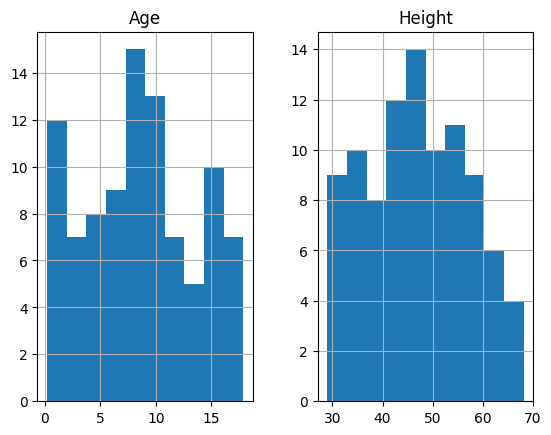

In [3]:
ages = data['Age']
heights = data['Height']
data = data[ages>0]
ages = data['Age']
heights = data['Height']
data.hist()

<Axes: xlabel='Age', ylabel='Height'>

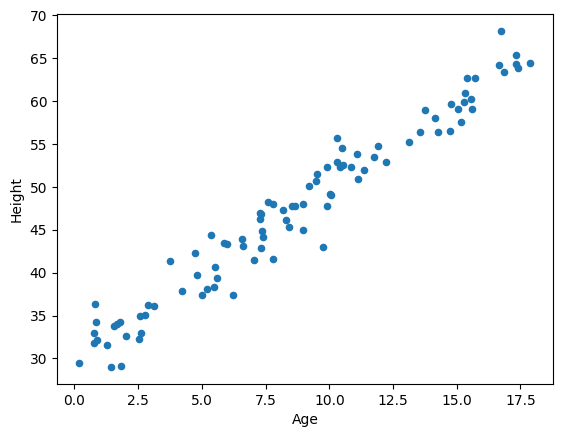

In [4]:
data.plot.scatter(x = 'Age', y = 'Height')

In [5]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(x=ages, y=heights, title='Height vs Age of People', labels={'x': 'Age (years)', 'y': 'Height (inches)'})
#fig.show()

In [6]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy #coverts to array
ages_np

array([14.76787382,  3.10767135,  7.26691701,  1.81517968, 16.75375763,
        5.35126307,  8.65571488,  4.20599293,  7.35669106,  1.66817819,
        8.2969588 , 14.74948482, 15.28545214, 16.65534197,  0.85918789,
        8.43332999, 11.92386163,  0.76828323, 11.36202254,  1.29597926,
       10.31206094, 17.39335272, 10.31003056,  6.23764582, 15.55153122,
        2.77346425, 15.59798962,  7.57789784,  2.04165705,  9.90665221,
        2.87252515,  1.54231936,  5.46202264, 15.04362695,  5.99372597,
        4.805291  ,  8.94992003,  5.02020985,  9.89555258,  5.20281507,
        0.19568558,  0.89217393,  7.30979593, 10.8545723 , 15.69876495,
        0.81216582, 15.40144747,  9.21599924,  8.98515379,  3.74369906,
        0.75192511,  6.5963469 ,  9.75112683,  7.40094567, 17.32712575,
       10.53406938, 15.16816596,  9.46971876, 13.54691548,  7.80132294,
        2.51910344,  4.71666526, 10.0386595 , 11.77125476,  8.53738026,
        2.58355771,  1.438003  , 10.40642157, 16.85933332, 12.22

In [7]:
ages_np.shape

(93,)

In [8]:
ages_np_reshaped = ages_np.reshape(len(ages), 1)
ages_np_reshaped

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [9]:
ages_np = np.array(ages).reshape(-1, 1)
heights_np = np.array(heights)
model = LinearRegression().fit(ages_np, heights_np)
model.coef_
#FOR EVERY INCREASE IN AGE BY ONE YEAR, THE HEIGHT INCREASES BY 2 INCHES

array([2.0014169])

In [10]:
x_new = np.array(list(range(19))).reshape(19, 1)
preds = model.predict(x_new)
fig = px.scatter(x=ages, y=heights, title='Height vs Age of People', labels={'x': 'Age (years)', 'y': 'Height (inches)'})

fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))

fig.write_image('base_pic.svg', width = 800)
#fig.show()


In [ ]:
from joblib import dump, load #save and load it to a file
dump(model, 'model.joblib')
model_in = load('model.joblib')
model_in.predict(np.array([[1]]))

In [ ]:
def is_float(s):
  try:
    float(s)
    return True
  except:
    return False

def float_string_to_np_arr(floats_str):
  floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
  return floats.reshape(len(floats), 1)

In [ ]:
def make_picture(training_data_filename, model, new_input_np_arr, output_file):
  data = pd.read_pickle(training_data_filename)
  ages = data['Age']
  data = data[ages>0]
  ages = data['Age']
  heights = data['Height']
  x_new = np.array(list(range(19))).reshape(19, 1)
  preds = model.predict(x_new)

  fig = px.scatter(x=ages, y=heights, title='Height vs Age of People', labels={'x': 'Age (years)', 'y': 'Height (inches)'})

  fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))

  new_preds = model.predict(new_input_np_arr)
  fig.add_trace(go.Scatter(x=new_input_np_arr.reshape(len(new_input_np_arr)), y=new_preds, name='New Outputs', mode='markers', marker=dict(color='purple', size=20, line=dict(color='purple'))))
  
  fig.write_image(output_file, width = 800)

  fig.show()

In [ ]:
make_picture('AgesAndHeights.pkl', model_in, float_string_to_np_arr('1, 3, 4.9') , 'x.svg')